**Homeworks – Basics in linear algebra and numerical methods, 2021/22. semester I.**

*Week 2*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
import numpy as np

# Ex1

## Problem

Read an RGB code of picture and apply a left-right mirroring.

## Solution

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

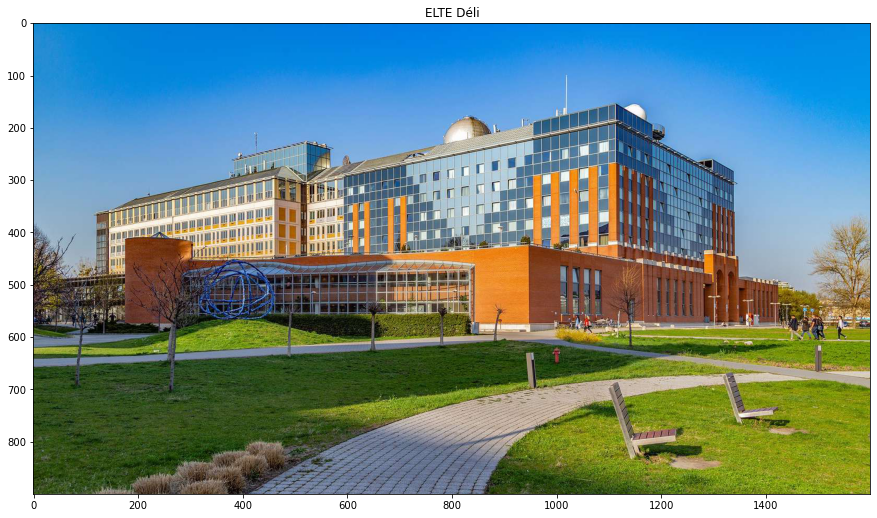

In [3]:
# Get a nice image
original_image = np.array(Image.open("images/elte-ttk-vezetes.jpg"))
# Also, show this
fig = plt.figure(figsize=(15, 10))
imgplot = plt.imshow(original_image)
plt.title("ELTE Déli")
plt.show()

The easiest way is to use the `numpy.fliplr()` function:

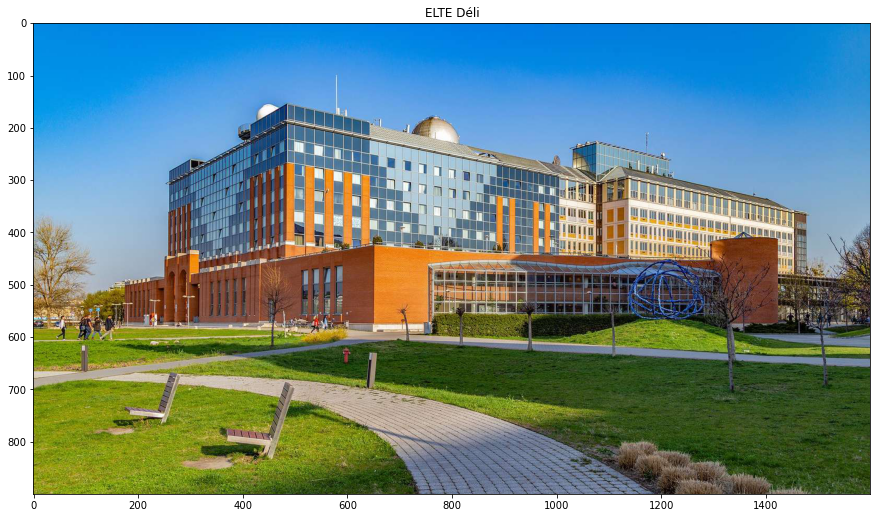

In [4]:
image = np.fliplr(original_image)
fig = plt.figure(figsize=(15, 10))
imgplot = plt.imshow(image)
plt.title("ELTE Déli")
plt.show()

Of course, we can do it manually be reversing the order of the coordinates:

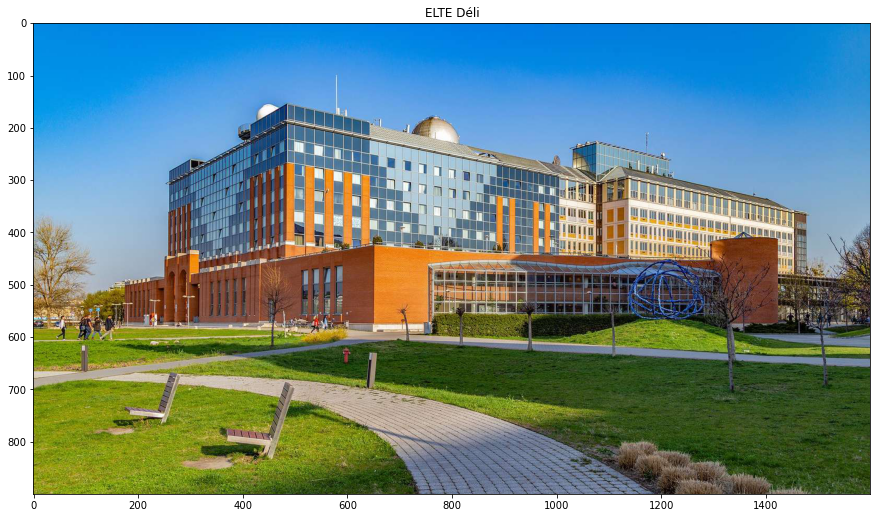

In [5]:
image =  original_image[:,::-1]
fig = plt.figure(figsize=(15, 10))
imgplot = plt.imshow(image)
plt.title("ELTE Déli")
plt.show()

We can manually check by picking a pixel then comparing the RGB layers of the original and the mirrored image matrix:

In [6]:
print('Original image first row, first column RGB colors')
print(original_image[0,0])

print('Mirrored image first row, last column RGB colors')
print(image[0,-1])

print('\n')
print('Original image first row, last column RGB colors')
print(original_image[0,-1])

print('Mirrored image first row, first column RGB colors')
print(image[0,0])

Original image first row, first column RGB colors
[ 12 141 209]
Mirrored image first row, last column RGB colors
[ 12 141 209]


Original image first row, last column RGB colors
[  2 137 227]
Mirrored image first row, first column RGB colors
[  2 137 227]


# Ex2

In [7]:
from itertools import combinations, product
from math import comb

## Problem

Take the numbers $1,2, \dots , 12$. Partition them into 2 groups such that each group has six
elements. Print all different partitions in a matrix, where one row shows one partition.

## Solution

### Simplified problem

First I will demonstrate my solution on a simplified problem.

Take the numbers $1,2, 3, 4$. Partition them into $2$ groups such that each group has $2$
elements. Print all different partitions in a matrix, where one row shows one partition.

In [8]:
# let n denote the number of elements
n = 4
# let k denote the number of elements in a group
k = 2

In [9]:
# my_list represents the n number of elements starting from one
my_list = list(range(1,n+1))

# the number of total combinations is choosing n from k
ncr = comb(n, k)
# then we create the combination of groups
comb_list = list(combinations(my_list, k))

# the number of total group combinations
ncr2 = comb(ncr, n//k)

# create the matrix M where the rows contain all the possible combinations of the groups
M = np.array(list(combinations(comb_list, n//k))).reshape(ncr2,n)

# filter out the rows of M where the number of unique values in a row is n, meaning that the row is a full partition
M_new = np.vstack(list(filter(lambda row: len(np.unique(row)) == n, M)))
# or we can reshape it as follows
M_new2 = M_new.reshape(M_new.shape[0],n//k,k)

print(f'The list of n numbers, n={n}:')
print(my_list)

print('\n')
print(f'We partition them into k={k} groups that each group has exactly {n//k} elements. The number of combinations is {ncr}.')
print(comb_list)

print('\n')
print(f'We generate all the possible combinations of these group into matrix M with shape: {M.shape}')
print(M)

print('\n')
print(f'We only keep rows where one row shows one partition (in other words, the number of unique values is n={n}). Shape: {M_new.shape}')
print(M_new)

print(f'Or we can reshape it so the groups and the partition layer are two separate dimensions. Shape: {M_new2.shape}')
print(M_new2)

The list of n numbers, n=4:
[1, 2, 3, 4]


We partition them into k=2 groups that each group has exactly 2 elements. The number of combinations is 6.
[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


We generate all the possible combinations of these group into matrix M with shape: (15, 4)
[[1 2 1 3]
 [1 2 1 4]
 [1 2 2 3]
 [1 2 2 4]
 [1 2 3 4]
 [1 3 1 4]
 [1 3 2 3]
 [1 3 2 4]
 [1 3 3 4]
 [1 4 2 3]
 [1 4 2 4]
 [1 4 3 4]
 [2 3 2 4]
 [2 3 3 4]
 [2 4 3 4]]


We only keep rows where one row shows one partition (in other words, the number of unique values is n=4). Shape: (3, 4)
[[1 2 3 4]
 [1 3 2 4]
 [1 4 2 3]]
Or we can reshape it so the groups and the partition layer are two separate dimensions. Shape: (3, 2, 2)
[[[1 2]
  [3 4]]

 [[1 3]
  [2 4]]

 [[1 4]
  [2 3]]]


### Original problem

Now, onto the original problem:

> Take the numbers $1,2, \dots , 12$. Partition them into 2 groups such that each group has six
elements. Print all different partitions in a matrix, where one row shows one partition.

In [10]:
# let n denote the number of elements
n = 12
# let k denote the number of elements in a group
k = 6

In [11]:
# my_list represents the n number of elements starting from one
my_list = list(range(1,n+1))

# the number of total combinations is choosing n from k
ncr = comb(n, k)
# then we create the combination of groups
comb_list = list(combinations(my_list, k))

# the number of total group combinations
ncr2 = comb(ncr, n//k)

# create the matrix M where the rows contain all the possible combinations of the groups
M = np.array(list(combinations(comb_list, n//k))).reshape(ncr2,n)

# filter out the rows of M where the number of unique values in a row is n, meaning that the row is a full partition
M_new = np.vstack(list(filter(lambda row: len(np.unique(row)) == n, M)))
# or we can reshape it as follows
M_new2 = M_new.reshape(M_new.shape[0],n//k,k)

print(f'The list of n numbers, n={n}:')
print(my_list)

print('\n')
print(f'We partition them into k={k} groups that each group has exactly {n//k} elements. The number of combinations is {ncr}.')
print(comb_list)

print('\n')
print(f'We generate all the possible combinations of these group into matrix M with shape: {M.shape}')
print(M)

print('\n')
print(f'We only keep rows where one row shows one partition (in other words, the number of unique values is n={n}). Shape: {M_new.shape}')
print(M_new)

print(f'Or we can reshape it so the groups and the partition layer are two separate dimensions. Shape: {M_new2.shape}')
print(M_new2)

The list of n numbers, n=12:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


We partition them into k=6 groups that each group has exactly 2 elements. The number of combinations is 924.
[(1, 2, 3, 4, 5, 6), (1, 2, 3, 4, 5, 7), (1, 2, 3, 4, 5, 8), (1, 2, 3, 4, 5, 9), (1, 2, 3, 4, 5, 10), (1, 2, 3, 4, 5, 11), (1, 2, 3, 4, 5, 12), (1, 2, 3, 4, 6, 7), (1, 2, 3, 4, 6, 8), (1, 2, 3, 4, 6, 9), (1, 2, 3, 4, 6, 10), (1, 2, 3, 4, 6, 11), (1, 2, 3, 4, 6, 12), (1, 2, 3, 4, 7, 8), (1, 2, 3, 4, 7, 9), (1, 2, 3, 4, 7, 10), (1, 2, 3, 4, 7, 11), (1, 2, 3, 4, 7, 12), (1, 2, 3, 4, 8, 9), (1, 2, 3, 4, 8, 10), (1, 2, 3, 4, 8, 11), (1, 2, 3, 4, 8, 12), (1, 2, 3, 4, 9, 10), (1, 2, 3, 4, 9, 11), (1, 2, 3, 4, 9, 12), (1, 2, 3, 4, 10, 11), (1, 2, 3, 4, 10, 12), (1, 2, 3, 4, 11, 12), (1, 2, 3, 5, 6, 7), (1, 2, 3, 5, 6, 8), (1, 2, 3, 5, 6, 9), (1, 2, 3, 5, 6, 10), (1, 2, 3, 5, 6, 11), (1, 2, 3, 5, 6, 12), (1, 2, 3, 5, 7, 8), (1, 2, 3, 5, 7, 9), (1, 2, 3, 5, 7, 10), (1, 2, 3, 5, 7, 11), (1, 2, 3, 5, 7, 12), (1, 2, 3, 5,

# Ex3

## Problem

Take a random array of size $6\times6\times6$. Sort their layers such that the minimums are in increasing
order: minimum of new layer 0 $\leq$ minimum of new layer 1 $\leq$ $\dots$ $\leq$minimum of new layer 5

## Solution

### Simplified problem

First I will show my solution using a $3\times3\times3$ matrix to better visualize the output.

In [12]:
# Let's define the shape of M
shape = (3, 3, 3)
# create M, a uniformly distributed matrix
M = np.random.uniform(low=0, high=10, size=shape)
# Create a map (dictionary) where the key is the number of the layer and the value is the minimal value in that layer
layer_mins = {layer: M[layer].min() for layer in range(M.shape[0])}
# Reorder the previous map where the values are in an ascending order
layer_mins_ordered = dict(sorted(layer_mins.items(), key=lambda item: item[1]))
# Reorder the layers so that the problem in the excercise is satisfied
M_new = np.vstack([M[layer] for layer in layer_mins_ordered.keys()]).reshape(shape)

print(f'Generated a uniformly distributed random matrix with shape {M.shape}:')
print(M)

print('\n')
print('The minimum values per layer:')
print(layer_mins)

print('\n')
print('The layerers ordered:')
print(layer_mins_ordered)

print('\n')
print(f'Final results, with ordered layers, with the matrix with the same shape {M_new.shape}:')
print(M_new)

Generated a uniformly distributed random matrix with shape (3, 3, 3):
[[[7.44219975 0.06143791 0.12013624]
  [1.83155932 6.32973166 0.62174139]
  [4.12386679 7.52346198 4.30610034]]

 [[2.94020893 1.31706867 2.91462629]
  [1.43574596 3.96717654 8.80105498]
  [5.60254764 8.6477889  8.11945366]]

 [[1.51889118 3.45347718 1.46504928]
  [7.4912009  2.70779593 8.93411868]
  [8.18701495 1.34152493 4.25028296]]]


The minimum values per layer:
{0: 0.06143791456167613, 1: 1.3170686708230128, 2: 1.341524930586866}


The layerers ordered:
{0: 0.06143791456167613, 1: 1.3170686708230128, 2: 1.341524930586866}


Final results, with ordered layers, with the matrix with the same shape (3, 3, 3):
[[[7.44219975 0.06143791 0.12013624]
  [1.83155932 6.32973166 0.62174139]
  [4.12386679 7.52346198 4.30610034]]

 [[2.94020893 1.31706867 2.91462629]
  [1.43574596 3.96717654 8.80105498]
  [5.60254764 8.6477889  8.11945366]]

 [[1.51889118 3.45347718 1.46504928]
  [7.4912009  2.70779593 8.93411868]
  [8.18701

### Original problem

Let's apply it to a $6\times6\times6$ matrix.

In [13]:
# Let's define the shape of M
shape = (6, 6, 6)
# create M, a uniformly distributed matrix
M = np.random.uniform(low=0, high=10, size=shape)
# Create a map (dictionary) where the key is the number of the layer and the value is the minimal value in that layer
layer_mins = {layer: M[layer].min() for layer in range(M.shape[0])}
# Reorder the previous map where the values are in an ascending order
layer_mins_ordered = dict(sorted(layer_mins.items(), key=lambda item: item[1]))
# Reorder the layers so that the problem in the excercise is satisfied
M_new = np.vstack([M[layer] for layer in layer_mins_ordered.keys()]).reshape(shape)

print(f'Generated a uniformly distributed random matrix with shape {M.shape}:')
print(M)

print('\n')
print('The minimum values per layer:')
print(layer_mins)

print('\n')
print('The layerers ordered:')
print(layer_mins_ordered)

print('\n')
print(f'Final results, with ordered layers, with the matrix with the same shape {M_new.shape}:')
print(M_new)

Generated a uniformly distributed random matrix with shape (6, 6, 6):
[[[1.80345762e+00 7.87227778e+00 3.78663002e-01 7.92347177e+00
   4.69467365e+00 4.06263537e-01]
  [3.63626658e+00 4.30419016e+00 8.56308044e+00 5.54079944e+00
   9.60305332e+00 8.08136089e-01]
  [7.82239077e+00 4.76578811e+00 3.58517449e+00 7.16632375e+00
   1.93669546e-01 6.42155560e-01]
  [8.80969858e+00 5.47098881e+00 8.42605557e+00 8.66356672e+00
   7.09311357e+00 3.63617543e-02]
  [6.89748420e+00 7.40052958e+00 9.39222060e+00 8.62454531e+00
   5.18441131e+00 7.25463982e+00]
  [9.70491001e-01 1.78144613e-01 3.02084513e+00 2.86247857e+00
   3.46858850e+00 9.03885560e+00]]

 [[6.80428600e+00 2.98866047e+00 4.86110341e+00 5.98844306e+00
   8.61912403e+00 7.62044453e+00]
  [5.47189787e+00 5.82820762e+00 1.79212403e+00 4.10214876e+00
   1.76618826e-01 7.68011253e+00]
  [3.68890647e+00 9.24994645e+00 5.44701921e+00 6.60663028e+00
   2.76621241e-01 7.37229135e+00]
  [4.58142461e+00 7.39352653e+00 6.24462339e+00 5.81850

# Ex4

## Problem

Take a stochastic matrix of size $20\times 10$. Print that row of this matrix, which has minimal
average distance from the other row vectors.

## Solution

### Simplified problem

First, I will show my solution step by step on a smaller, random integer matrix, then generalize the problem using a stochastic matrix.

In [14]:
# Let's generate a random integer matrix
M = np.random.randint(low=0, high=10, size=(4,4))
# Select row id - k
k = 0
# Delete the selected row from the original matrix
matrix_without_k = np.delete(M,k,axis=0)
# Calculate the elemet-wise differences between the selected row and the rows of the matrix without the selected row
matrix_diffs_with_row_k = matrix_without_k-M[k]*np.ones((M.shape[0]-1,M.shape[1]))
# Calculate the euclidean distance
diffs_from_rows_for_row_k = np.array([np.linalg.norm(row) for row in matrix_diffs_with_row_k])
# Calculate the average of the euclidean distance
average_diff_from_rows_for_row_k = np.mean(diffs_from_rows_for_row_k)

# print results
print('The original matrix:')
print(M)

print('\n') # newline
print(f'selected k-th row - {k}: {M[k]}')

print('\n') # newline
print(f'Matrix without selected row:')
print(matrix_without_k)

print('\n') # newline
print(f'Difference between the selected row and all other rows (element-wise):')
print(matrix_diffs_with_row_k)

print('\n') # newline
print(f'Euclidean norm per row-pairs:')
print(diffs_from_rows_for_row_k)

print('\n') # newline
print(f'Average of the euclidean norm: {average_diff_from_rows_for_row_k}')

The original matrix:
[[4 2 5 3]
 [5 3 2 6]
 [8 6 5 9]
 [8 7 3 8]]


selected k-th row - 0: [4 2 5 3]


Matrix without selected row:
[[5 3 2 6]
 [8 6 5 9]
 [8 7 3 8]]


Difference between the selected row and all other rows (element-wise):
[[ 1.  1. -3.  3.]
 [ 4.  4.  0.  6.]
 [ 4.  5. -2.  5.]]


Euclidean norm per row-pairs:
[4.47213595 8.24621125 8.36660027]


Average of the euclidean norm: 7.028315823858552


Let's implement it for the whole matrix

In [15]:
def average_distance_from_rows(k, M):
    # Delete row number k from the original matrix M
    matrix_without_k = np.delete(M, k, axis=0)
    # Calculate the differences between the selected row and the rows of the matrix without the selected row
    matrix_diffs_with_row_k = matrix_without_k-M[k]*np.ones((M.shape[0]-1,M.shape[1]))
    # Calculate the euclideean distance
    diffs_from_rows_for_row_k = np.array([np.linalg.norm(row) for row in matrix_diffs_with_row_k])
    # Calculate the average of the euclidean distance
    average_diff_from_rows_for_row_k = np.mean(diffs_from_rows_for_row_k)
    return average_diff_from_rows_for_row_k

In [16]:
avg_dists = [average_distance_from_rows(k, M) for k in range(M.shape[0])]
min_dist_row_number = np.argmin(avg_dists)

print('Average distances of the rows from the other row vectors:')
print(avg_dists)

print('\n')
print('The index of the row with the minimal average distance from the other row vectors is:')
print(min_dist_row_number)

print('\n')
print('The elements of that row are:')
print(M[min_dist_row_number])

Average distances of the rows from the other row vectors:
[7.028315823858552, 5.316453843350414, 5.565233664672832, 5.431105194391865]


The index of the row with the minimal average distance from the other row vectors is:
1


The elements of that row are:
[5 3 2 6]


### Original problem

In [17]:
def average_distance_from_rows(k, M):
    # Delete row number k from the original matrix M
    matrix_without_k = np.delete(M, k, axis=0)
    # Calculate the differences between the selected row and the rows of the matrix without the selected row
    matrix_diffs_with_row_k = matrix_without_k-M[k]*np.ones((M.shape[0]-1,M.shape[1]))
    # Calculate the euclideean distance
    diffs_from_rows_for_row_k = np.array([np.linalg.norm(row) for row in matrix_diffs_with_row_k])
    # Calculate the average of the euclidean distance
    average_diff_from_rows_for_row_k = np.mean(diffs_from_rows_for_row_k)
    return average_diff_from_rows_for_row_k

In [18]:
def stochastic_matrix(shape:tuple):
    i, j = shape
    R = np.random.randint(10, size=(i, j))
    R_new = np.zeros((i,j))
    # Take sum of the rows
    R_rowsum = R @ np.ones([j,])
    # Divide each row with the row-sum
    for k in range(i):
        R_new[k,:] = R[k,:]/R_rowsum[k]
    return R_new

In [19]:
shape = (20, 10)
M = stochastic_matrix(shape)
avg_dists = [average_distance_from_rows(k, M) for k in range(M.shape[0])]
min_dist_row_number = np.argmin(avg_dists)

print(f'A random stochastix matrix with shape {M.shape}:')
print(M)

print('\n') #newline
print('We verify that this is indeed stochastic:')
print(M @ np.ones([M.shape[1],]))

print('\n') #newline
print('Average distances of the rows from the other row vectors:')
print(avg_dists)

print('\n') #newline
print('The index of the row with the minimal average distance from the other row vectors is:')
print(f'{min_dist_row_number}')
print('\n') #newline

print('The elements of that row are:')
print(f'{M[min_dist_row_number]}')

A random stochastix matrix with shape (20, 10):
[[0.06382979 0.10638298 0.14893617 0.12765957 0.10638298 0.0212766
  0.14893617 0.10638298 0.12765957 0.04255319]
 [0.10204082 0.18367347 0.02040816 0.06122449 0.12244898 0.
  0.10204082 0.16326531 0.14285714 0.10204082]
 [0.27272727 0.12121212 0.         0.06060606 0.09090909 0.
  0.24242424 0.03030303 0.09090909 0.09090909]
 [0.075      0.075      0.15       0.1        0.125      0.1
  0.2        0.05       0.125      0.        ]
 [0.0212766  0.0212766  0.         0.17021277 0.12765957 0.17021277
  0.08510638 0.14893617 0.17021277 0.08510638]
 [0.04347826 0.19565217 0.08695652 0.13043478 0.04347826 0.08695652
  0.08695652 0.19565217 0.10869565 0.02173913]
 [0.10909091 0.09090909 0.05454545 0.10909091 0.07272727 0.10909091
  0.16363636 0.10909091 0.09090909 0.09090909]
 [0.         0.06896552 0.06896552 0.20689655 0.17241379 0.10344828
  0.13793103 0.03448276 0.17241379 0.03448276]
 [0.07407407 0.14814815 0.01851852 0.16666667 0.16666667